## KNN (задания 1-3)

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

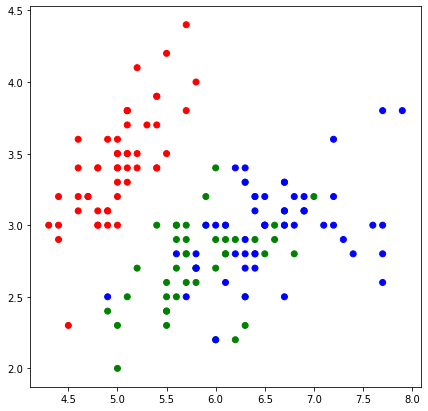

In [4]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [5]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    
    return np.sqrt(distance)

In [6]:
def knn(x_train, y_train, x_test, k, weight_function):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        i = 0
        for d in sorted(test_distances)[0:k]:
            w = 1
            if weight_function is not None:
                w = weight_function(i, d[0], d[1], k)
            classes[d[1]] += w
            i += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
def get_graph(X_train, y_train, k, title, weight_function):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .05 # .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k, weight_function)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    t = f"Трехклассовая kNN классификация при k = {k}"
    if title is not None:
        t += " -- " + title
    plt.title(t)
    plt.show()

In [9]:
def test(k, weight_function):
    y_pred = knn(X_train, y_train, X_test, k, weight_function)
    acc = accuracy(y_pred, y_test)
    print(f'Точность алгоритма при k = {k}: {acc:.3f}')
    return acc

def test_many(title, weight_function=None):
    ks = [1, 2, 3, 4, 5, 6, 7, 10, 20]
    accs = []
    best_acc = 0
    best_k = 0
    for k in ks:
        acc = test(k, weight_function)
        accs.append(acc)
        if acc > best_acc:
            best_k = k
            best_acc = acc

    get_graph(X_train, y_train, best_k, title + f' -- accuracy = {best_acc:.3f}', weight_function)

    plt.title(title)
    plt.xlabel("k")
    plt.ylabel("accuracy")
    plt.plot(ks, accs)
    plt.show()


Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.833
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 20: 0.833


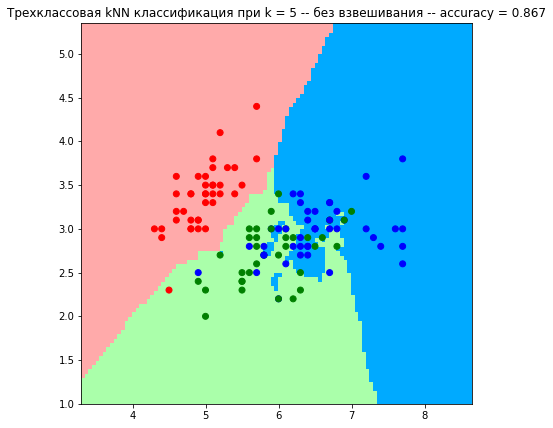

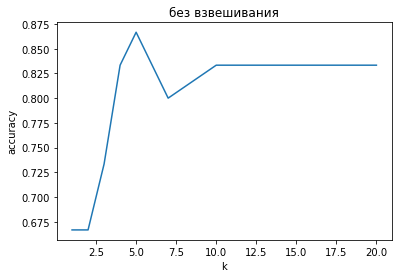

In [10]:
test_many("без взвешивания")


Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.733
Точность алгоритма при k = 5: 0.800
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.833
Точность алгоритма при k = 10: 0.867
Точность алгоритма при k = 20: 0.833


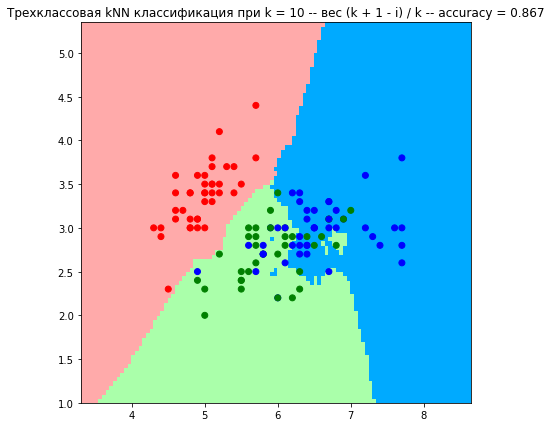

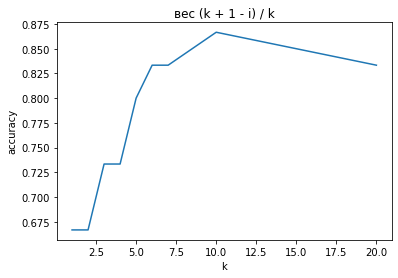

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.833
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 20: 0.833


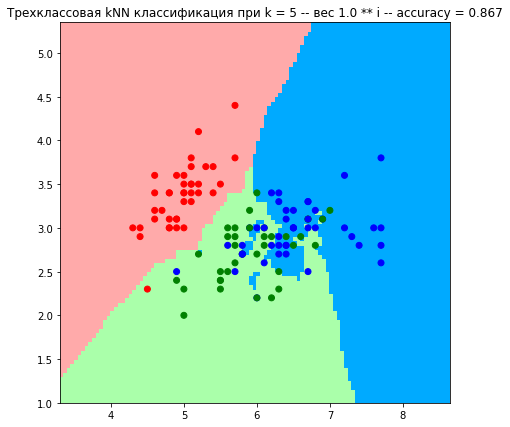

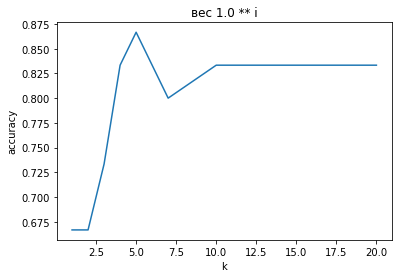

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.733
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.833
Точность алгоритма при k = 10: 0.867
Точность алгоритма при k = 20: 0.867


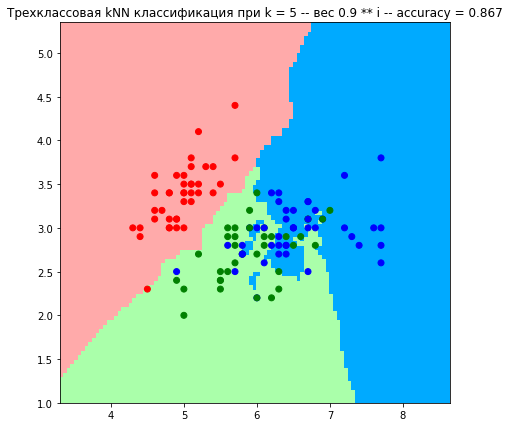

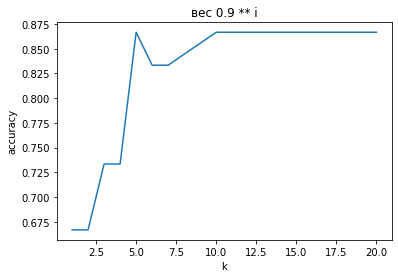

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.733
Точность алгоритма при k = 5: 0.800
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.767
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 20: 0.867


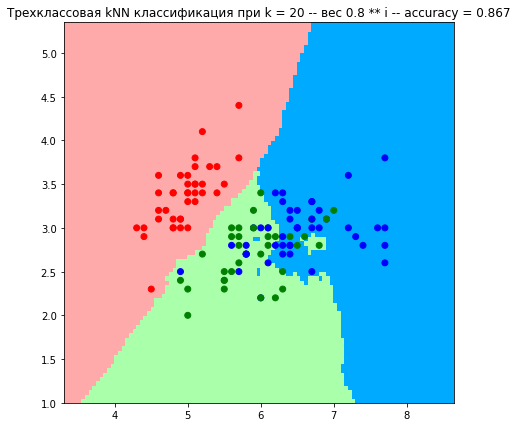

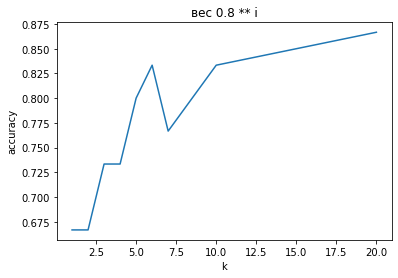

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.733
Точность алгоритма при k = 5: 0.733
Точность алгоритма при k = 6: 0.733
Точность алгоритма при k = 7: 0.767
Точность алгоритма при k = 10: 0.767
Точность алгоритма при k = 20: 0.767


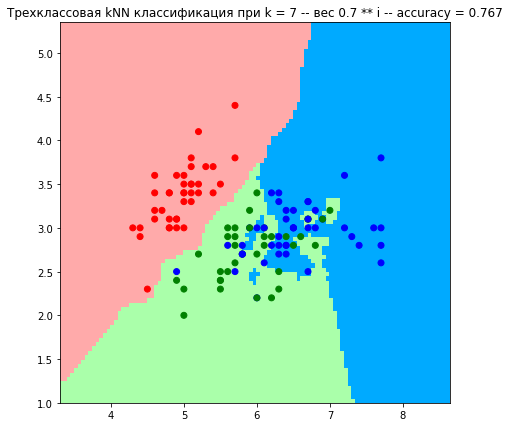

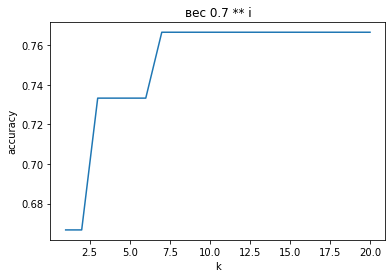

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.667
Точность алгоритма при k = 4: 0.667
Точность алгоритма при k = 5: 0.667
Точность алгоритма при k = 6: 0.667
Точность алгоритма при k = 7: 0.667
Точность алгоритма при k = 10: 0.667
Точность алгоритма при k = 20: 0.667


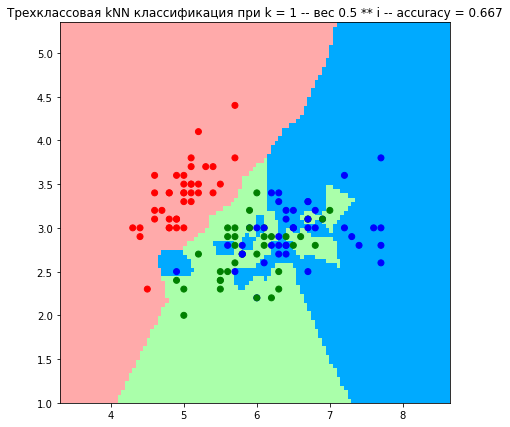

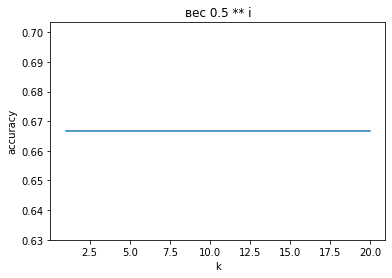

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.667
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.833
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.833
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.833
Точность алгоритма при k = 20: 0.833


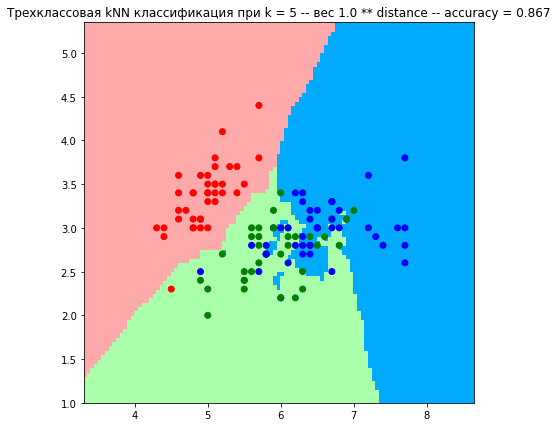

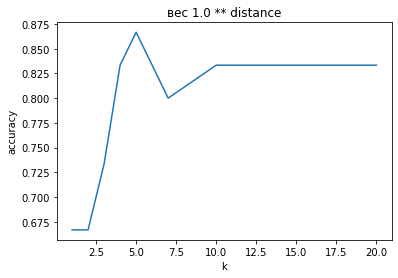

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.733
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.800
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.867
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.867
Точность алгоритма при k = 20: 0.833


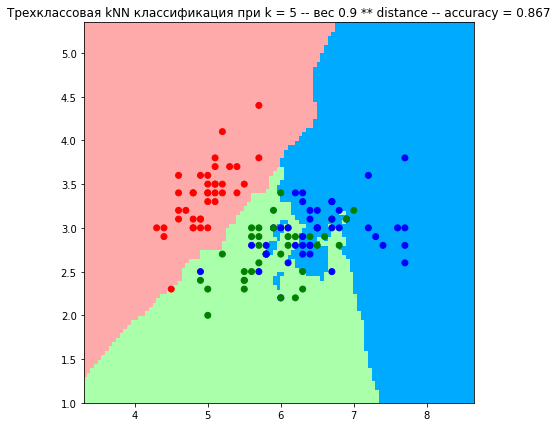

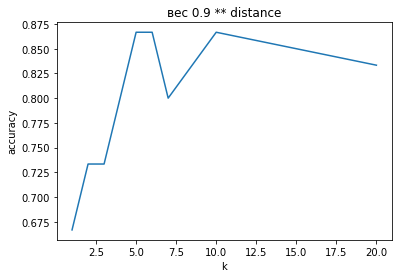

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.700
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.767
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.867
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.867
Точность алгоритма при k = 20: 0.833


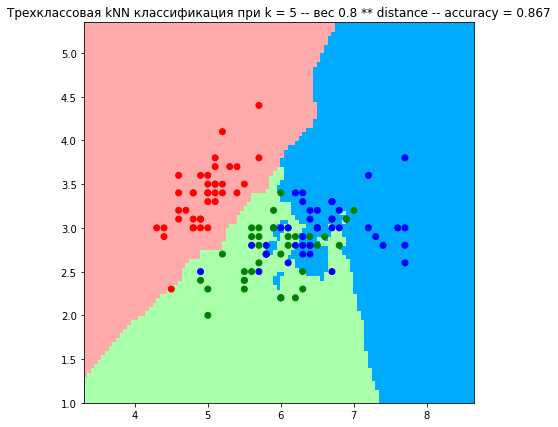

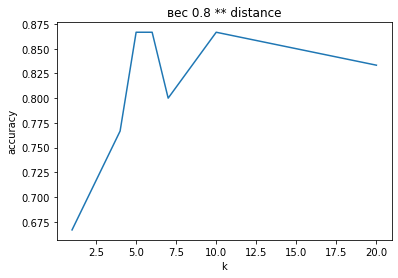

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.733
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.800
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.867
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.867
Точность алгоритма при k = 20: 0.833


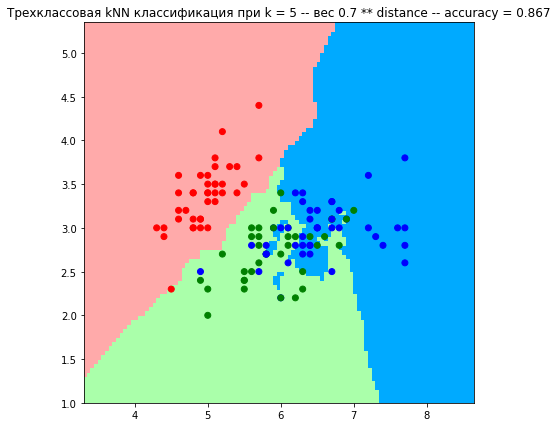

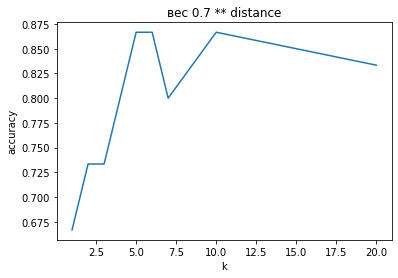

Точность алгоритма при k = 1: 0.667
Точность алгоритма при k = 2: 0.733
Точность алгоритма при k = 3: 0.733
Точность алгоритма при k = 4: 0.767
Точность алгоритма при k = 5: 0.867
Точность алгоритма при k = 6: 0.867
Точность алгоритма при k = 7: 0.800
Точность алгоритма при k = 10: 0.867
Точность алгоритма при k = 20: 0.833


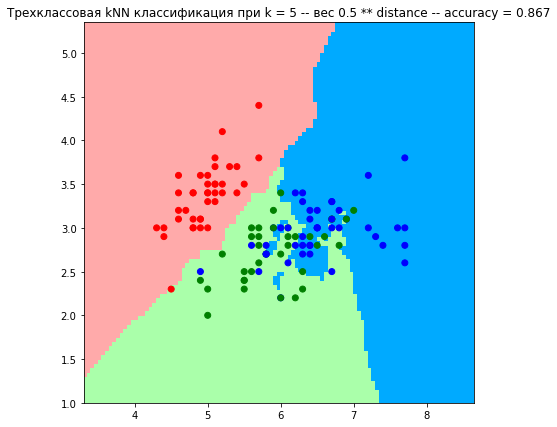

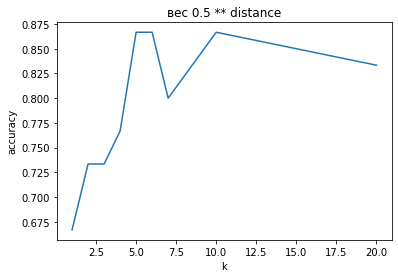

In [11]:
# Задание 1, 3

# вес (k + 1 -i)/k
def weights_k_number(i, distance, cls, k):
    return (k + 1 - i) / k

test_many(f'вес (k + 1 - i) / k', weights_k_number)

# вес q ** i
for q in [1, .9, .8, .7, .5]:
    def weights_q_number(i, distance, cls, k):
        return q ** i
    test_many(f'вес {q:.1f} ** i', weights_q_number)

    
# Задание 2, 3
# Вес q ** distance
for q in [1, .9, .8, .7, .5]:
    def weights_q_distance(i, distance, cls, k):
        return q ** distance
    test_many(f'вес {q:.1f} ** distance', weights_q_distance)


## Выводы
* Ни одна из весовых функций не улучшила наилучшую accuracy
* и q ** i и q ** distance при q=0.9 давали наличшую accuracy более стабильно, при большем варианте k, то есть, наверное, такой вариант будет проще настраивать по другим параметрам.
* По изменению разделяющих гиперплоскостей - при понижении q области разных классов проникали друг в друга. 

## K-means (задание 4)

In [12]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

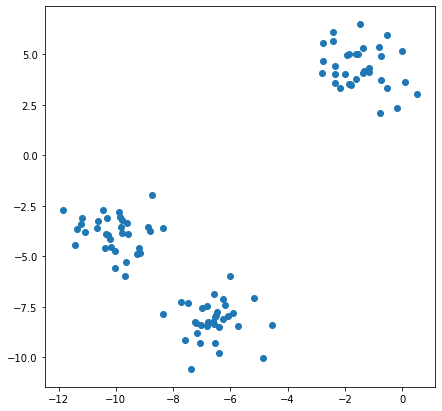

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

In [14]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [15]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'lime', 'orange', 'gray', 'brown', 'black']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for ci, centroid in enumerate(centroids):
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, color=colors[ci])
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [16]:
def meansquare_intracluster(X, centroids, clusters):
    s = 0
    for ci in clusters:
        s += np.mean(list([e_metrics(x, centroids[ci])**2 for x in clusters[ci]]))
    return s

In [17]:
def test(k, max_iterations=10, min_distance=0.0001):
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    msi = meansquare_intracluster(X, centroids, clusters)
    visualize(centroids, clusters)
    print(f'k = {k}, max_iterations = {max_iterations}, msi = {msi:.3f}')
    return msi


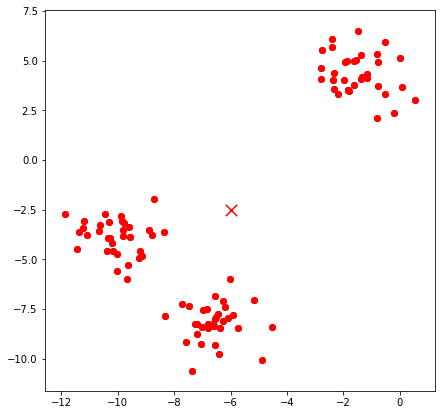

k = 1, max_iterations = 10, msi = 41.182


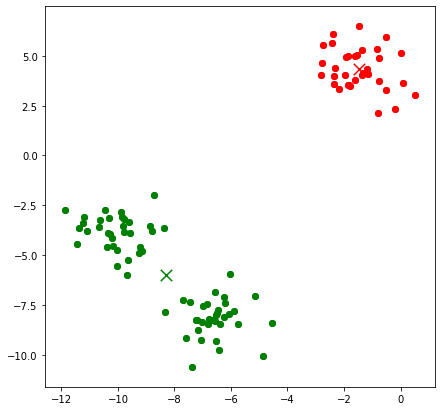

k = 2, max_iterations = 10, msi = 10.882


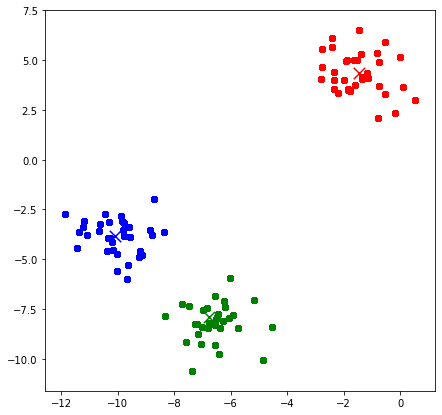

k = 3, max_iterations = 10, msi = 6.055


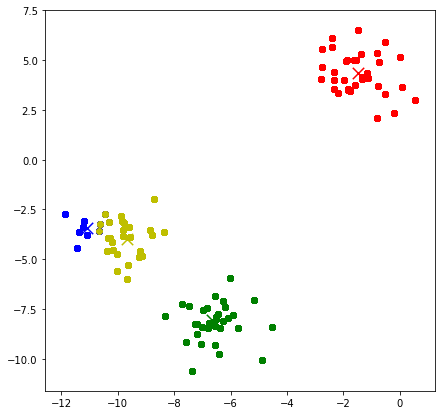

k = 4, max_iterations = 10, msi = 5.407


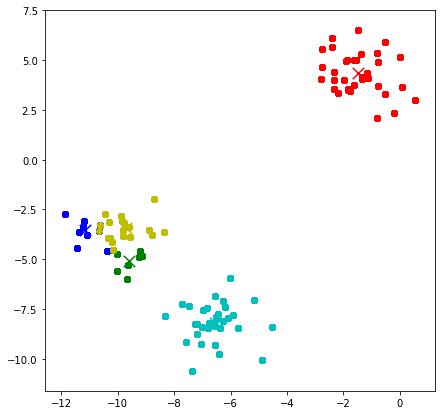

k = 5, max_iterations = 10, msi = 5.136


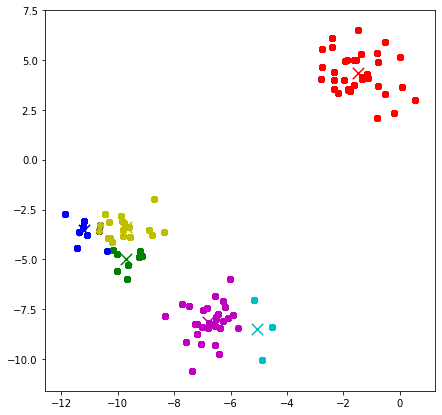

k = 6, max_iterations = 10, msi = 5.787


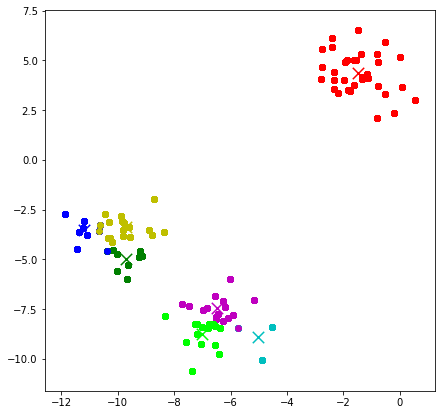

k = 7, max_iterations = 10, msi = 5.647


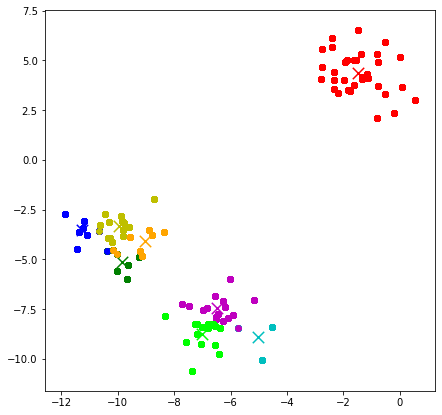

k = 8, max_iterations = 10, msi = 5.859


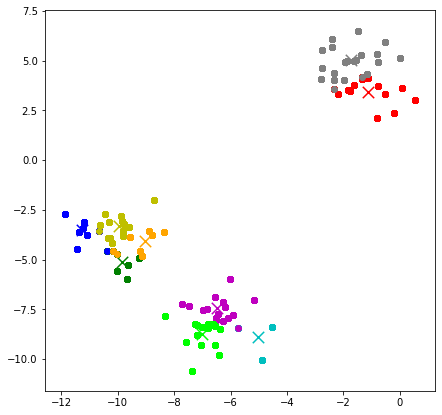

k = 9, max_iterations = 10, msi = 6.188


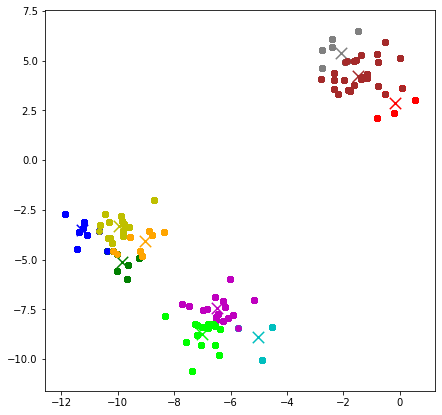

k = 10, max_iterations = 10, msi = 6.356


<function matplotlib.pyplot.show(*args, **kw)>

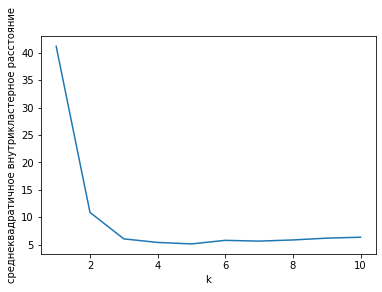

In [18]:
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
msis = []
for k in ks:
    msis.append(test(k))

plt.xlabel("k")
plt.ylabel("среднеквадратичное внутрикластерное расстояние")
plt.plot(ks, msis)
plt.show

## Выводы:
* Локтевая точка числа кластеров объяснимо оказалась k=3 (визуальное число кластеров) 
* Наименьшее внутрикластерное расстояние оказалось при k=5